### Урок 3. Классификация. Логистическая регрессия

In [226]:
import numpy as np
import matplotlib.pyplot as plt

**Задача 1**

Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [227]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [228]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [229]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [230]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [231]:
X_st = X.copy()
X_st[1:, :] = calc_std_feat(X[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735]])

In [232]:
def calc_logloss(y, y_pred):
    np.clip(a=y_pred, a_min=1e-10, a_max=(1 - 1e-10), out=y_pred)
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [233]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [234]:
y_true = np.array([0, 1])
preds = np.array([1, 0], dtype='float64')
calc_logloss(y_true, preds)

23.025850888570275

In [235]:
calc_logloss(np.array([0, 0]), np.array([0, 1], dtype='float64'))

11.512925423650046

**Задача 2**

На данных из урока изучите влияние гиперпараметров на ошибку алгоритма.

In [236]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

Logistic Regression

In [237]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [238]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.4953528  -0.15022151  0.63573133  1.51107264] 0.9605187009381438
1000 [ 0.4938949  -0.16204804  0.6239048   1.49924612] 0.9520838140030554
1500 [ 0.49234185 -0.17374272  0.61221011  1.48755143] 0.9438292640802555
2000 [ 0.49069511 -0.18530445  0.60064839  1.47598971] 0.9357542442274172
2500 [ 0.48895625 -0.19673216  0.58922068  1.464562  ] 0.9278578519174927
3000 [ 0.4871269  -0.20802482  0.57792801  1.45326933] 0.9201390914525023
3500 [ 0.48520879 -0.21918148  0.56677136  1.44211267] 0.9125968764926398
4000 [ 0.48320372 -0.23020121  0.55575162  1.43109294] 0.9052300326754263
4500 [ 0.48111355 -0.24108315  0.54486969  1.42021101] 0.8980373003001537
5000 [ 0.47894023 -0.25182646  0.53412637  1.40946769] 0.891017337053766


In [239]:
#проверим эти параметры
alphas = [1e-2, 1e-3, 1e-4]
iterations = [1e3, 1e4, 1e5]

In [240]:
#напишем функцию для проверки параметров
def eval_model_test(X, y, iterations, alpha=1e-4):
    model_dict = {}
    np.random.seed(42)
    errs = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errs.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    model_dict = {'alpha':  alpha, 
                 'iterations': iterations,
                 'error':  err}
    erros_dict = {f'alpha = {alpha}, iterations = {iterations}': errs}
    
    return W, model_dict, erros_dict

In [241]:
result_list = []
errors_list = []
for i in alphas:
    for j in iterations:
        name = f'{alpha} + {iterations}'
        _, name, errors = eval_model_test(X_st, y, iterations=int(j), alpha=i)
        result_list.append(name)
        errors_list.append(errors)

100 [ 0.45322969 -0.35172665  0.43422619  1.30956751] 0.8309022784598661
200 [ 0.38668772 -0.50817028  0.27778256  1.15312387] 0.751826594923962
300 [ 0.31555473 -0.61070823  0.17524461  1.05058593] 0.7143824848567445
400 [ 0.25159549 -0.67106314  0.1148897   0.99023102] 0.698947351863089
500 [ 0.19853263 -0.70396159  0.08199125  0.95733256] 0.6927255733939008
600 [ 0.15597286 -0.72114158  0.06481126  0.94015258] 0.6899731836925931
700 [ 0.12231197 -0.72993627  0.05601657  0.93135788] 0.6885874573832071
800 [ 0.09585288 -0.73441014  0.0515427   0.92688402] 0.687818429373992
900 [ 0.07511571 -0.73669196  0.04926088  0.9246022 ] 0.6873683061733192
1000 [ 0.05888733 -0.73786725  0.04808559  0.92342691] 0.6870983118709307
1000 [ 0.05888733 -0.73786725  0.04808559  0.92342691] 0.6870983118709307
2000 [ 0.00576909 -0.73927409  0.04667875  0.92202007] 0.6866824351210682
3000 [ 0.0012744  -0.73930197  0.04665086  0.92199218] 0.6866794674946131
4000 [ 8.94369494e-04 -7.39304167e-01  4.66486722e

In [242]:
from pprint import pprint

In [243]:
pprint(result_list)

[{'alpha': 0.01, 'error': 0.6870983118709307, 'iterations': 1000},
 {'alpha': 0.01, 'error': 0.6866794461264334, 'iterations': 10000},
 {'alpha': 0.01, 'error': 0.6866794461264335, 'iterations': 100000},
 {'alpha': 0.001, 'error': 0.8300554256322981, 'iterations': 1000},
 {'alpha': 0.001, 'error': 0.6870980388118556, 'iterations': 10000},
 {'alpha': 0.001, 'error': 0.6866794461264335, 'iterations': 100000},
 {'alpha': 0.0001, 'error': 0.9520838140030554, 'iterations': 1000},
 {'alpha': 0.0001, 'error': 0.8299710624674959, 'iterations': 10000},
 {'alpha': 0.0001, 'error': 0.6870980115519545, 'iterations': 100000}]


In [244]:
best_params = 0
best_err = np.inf
for i in result_list:
    if i['error'] < best_err:
        best_err = i['error']
        best_param = i
print(f'Среди исследуемых параметров alphas = {alphas}, iterations = {iterations}')
print('Лучшие параметры:')
print(best_param)

Среди исследуемых параметров alphas = [0.01, 0.001, 0.0001], iterations = [1000.0, 10000.0, 100000.0]
Лучшие параметры:
{'alpha': 0.01, 'iterations': 10000, 'error': 0.6866794461264334}


In [245]:
for i in errors_list:
    print(i.keys())

dict_keys(['alpha = 0.01, iterations = 1000'])
dict_keys(['alpha = 0.01, iterations = 10000'])
dict_keys(['alpha = 0.01, iterations = 100000'])
dict_keys(['alpha = 0.001, iterations = 1000'])
dict_keys(['alpha = 0.001, iterations = 10000'])
dict_keys(['alpha = 0.001, iterations = 100000'])
dict_keys(['alpha = 0.0001, iterations = 1000'])
dict_keys(['alpha = 0.0001, iterations = 10000'])
dict_keys(['alpha = 0.0001, iterations = 100000'])


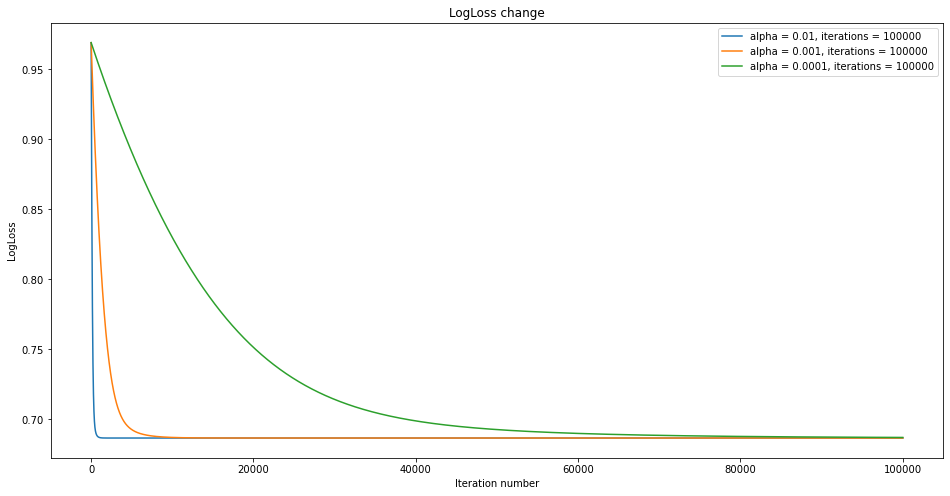

In [256]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize= (16, 8))
for i in range(2, len(errors_list), 3):
    obj = errors_list[i]
    value = list(obj.values())[0]
    key = list(obj.keys())[0]
    plt.plot(range(len(value)), value, label = key)
plt.title('LogLoss change')
plt.xlabel('Iteration number')
plt.ylabel('LogLoss')
plt.legend(loc='upper right')

**Выводы**

Изучили влияние параметров - скорости обучения и количетсва итераций на ошибку алгоритма. Чем больше скорость обучения, тем быстрее уменьшается ошибка (также есть риск пропустить минимум, как и в линейной регрессии, так как с основе лежит тот же подход).
Чем больше количество итераций, тем точнее можно найти минимальную ошибку. Зависимость между параметрами та же, что и в линейной регрессии, чем больше скорость обучения, тем менбше итераций. 

**Задача 3**

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model.

In [259]:
def calc_pred_proba(X, W):
    z = np.dot(W, X)
    #return 1 / (1 + np.exp(-z))
    return sigmoid(z)

In [260]:
W = eval_model(X_st, y, iterations=100)
W

10 [ 0.49668788 -0.13850472  0.64744812  1.52278944] 0.9689605369510218
20 [ 0.49666157 -0.13874508  0.64720776  1.52254907] 0.9687865125930293
30 [ 0.49663522 -0.1389854   0.64696744  1.52230876] 0.9686125608915482
40 [ 0.49660883 -0.13922566  0.64672718  1.5220685 ] 0.9684386818420672
50 [ 0.4965824  -0.13946587  0.64648697  1.52182829] 0.9682648754400607
60 [ 0.49655593 -0.13970603  0.64624681  1.52158813] 0.9680911416809893
70 [ 0.49652942 -0.13994613  0.64600671  1.52134802] 0.9679174805602919
80 [ 0.49650288 -0.14018619  0.64576665  1.52110797] 0.967743892073394
90 [ 0.49647629 -0.14042619  0.64552665  1.52086797] 0.9675703762157056
100 [ 0.49644967 -0.14066614  0.6452867   1.52062802] 0.9673969329826173


array([ 0.49644967, -0.14066614,  0.6452867 ,  1.52062802])

In [270]:
print(calc_pred_proba(X_st, W))

[0.18430283 0.34250941 0.3909553  0.25544167 0.92275363 0.44165069
 0.93638606 0.99165344 0.15494967 0.64585444]


**Задача 4**

Создайте функцию calc_pred, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, а также порог вероятности.

In [289]:
def calc_pred(X, W, threshold=0.5):
    return np.where(sigmoid(np.dot(W, X)) > 0.5, 1, 0)  

In [290]:
print(calc_pred(X_st, W))

[0 0 0 0 1 0 1 1 0 1]
